In [1]:
import pandas as pd
import seaborn as sns

import math
import turtle

import time

## 基本编程训练（一）

1. 编写一个函数, 类似于(但简单些) R 的 `seq( )`, 展示从 `From` 到 `To` 的序列, 如果 `by` 有值, 则其绝对值为步长. 不用任何非基本函数.

In [2]:
def seq(start, end=None, step=1):
    if isinstance(start, list):
        end = len(start) 
        start = 0
    if end == None:
        end = start
        start = 0
    _seq = []
    length = int(abs((start - end) // step))
    step = - step if start > end else step
    for _ in range(length):
        _seq.append(start)
        start += step
    return _seq

In [3]:
seq(3, -1, .5)

[3, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5]

In [4]:
seq(5, 1)

[5, 4, 3, 2]

In [5]:
seq(5)

[0, 1, 2, 3, 4]

In [6]:
seq(-5)

[0, -1, -2, -3, -4]

In [7]:
seq(1.5, 3, 0.25)

[1.5, 1.75, 2.0, 2.25, 2.5, 2.75]

In [8]:
seq([1, 1, 5, -3, 1])

[0, 1, 2, 3, 4]

In [9]:
seq(1, 1)

[]

2. 编写函数, 可以得到一个数组的乘积, 和, 均值, 累积乘积, 累积和, 累积均值(当然可以分别编写各自的函数), 不用非基本函数(可以用 `dict` 作为输出形式)

In [10]:
def summary(nums):
    n = 0
    _product = 1
    _sum = 0
    _cumproduct = []
    _cumsum = []
    _cummean = []
    for num in nums:
        n += 1
        _product *= num
        _sum = _sum + num
        _mean = _sum / n
        _cumproduct.append(_product)
        _cumsum.append(_sum)
        _cummean.append(_mean)
    return {
        "Product": _product,
        "Sum": _sum,
        "Mean": _mean,
        "CumProduct": _cumproduct,
        "CumSum": _cumsum,
        "CumMean": _cummean
    }

In [11]:
summary([1, 2, 4, 8, 16])

{'Product': 1024,
 'Sum': 31,
 'Mean': 6.2,
 'CumProduct': [1, 2, 8, 64, 1024],
 'CumSum': [1, 3, 7, 15, 31],
 'CumMean': [1.0, 1.5, 2.3333333333333335, 3.75, 6.2]}

3. 编一个程序产生 (0, 1) 区间的随机数列. 在老程序中, 人们经常取 m = 65536, β = 2053, α = 13849, 其实没有关系, 但m 需要取大一些, 比如m = 216. 也请点出随机数的散 点图及直方图, 看其像不像是随机的(画图函数随意).

In [12]:
def rand(count, seed=0, m=65536, beta=2053, alpha=13849):
    _rand = []
    x = seed
    for _ in range(count):
        x = (beta * x + alpha) % m
        _rand.append(x / m)
    return _rand

In [13]:
count = 1000
df = pd.DataFrame(
    {
        "index": range(count),
        "value": rand(count)
    }
)

<AxesSubplot:xlabel='index', ylabel='value'>

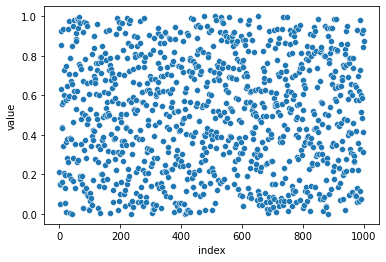

In [14]:
sns.scatterplot(x="index", y="value", data=df)

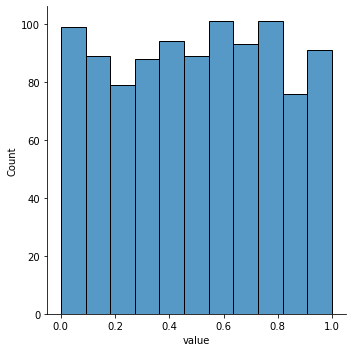

In [15]:
sns.displot(df["value"])

4. 请编写一个产生状态随机数序列的函数, 并用直方图来验证(画图函数随意)

In [16]:
def randn(count, mu=0, sigma=1, seed=1, n=12):
    _randn = []
    _rand = rand(count * n, seed)
    for i in range(count):
        y = mu + sigma * (sum(_rand[n*i:n*(i+1)]) - n / 2) / math.sqrt(n / 12)
        _randn.append(y)
    return _randn

In [17]:
count = 1000
df = pd.DataFrame(
    {
        "index": range(count),
        "value": randn(count)
    }
)

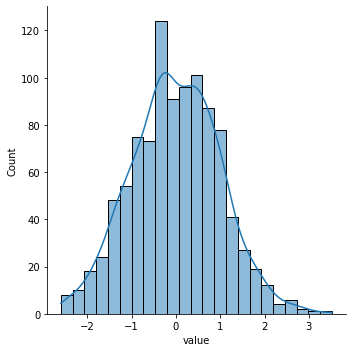

In [18]:
sns.displot(df["value"], kde=True)

5. 全部利用前面自编的函数产生 2 维随机游走, 并画出轨迹图(画图函数随意)

In [19]:
s = turtle.getscreen()
t = turtle.Turtle()

steps = 1000
x = randn(steps, seed=0)
y = randn(steps, seed=1)
x0 = 0
y0 = 0
for i, j in zip(x, y):
    x0 += i
    y0 += j
    t.goto(x0 * 10, y0 * 10)
    time.sleep(0.1)
turtle.done()